# Purpose


This notebook demonstrates the data pipeline from raw tables to analytical datasets. At the end of this activity, train & test data sets are created from raw data.



## Imports

In [1]:
from pprint import pprint
import os
import os.path as op
import shutil
import datetime

# standard third party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.options.mode.use_inf_as_na = True

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append(r"D:\CodeTemplate-Regrassion\regression-py\regression-py\src")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
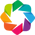

In [4]:
# standard code-template imports
from ta_lib.core.api import (
    create_context, get_dataframe, get_feature_names_from_column_transformer, get_package_path,
    display_as_tabs, string_cleaning, merge_info, initialize_environment,
    list_datasets, load_dataset, save_dataset
)
import ta_lib.eda.api as eda

In [5]:
import warnings

warnings.filterwarnings('ignore', message="The default value of regex will change from True to False in a future version.", 
                        category=FutureWarning)

In [6]:
initialize_environment(debug=False, hide_warnings=True)

## Utility functions

# 1. Initialization

In [7]:
config_path = op.join('conf', 'config.yml')
context = create_context(config_path)
pprint(list_datasets(context))

google_search = load_dataset(context, 'raw/google_search')
sales = load_dataset(context, 'raw/sales')
manufacturer = load_dataset(context, 'raw/manufacturer')
Theme = load_dataset(context, 'raw/Theme')
Theme_product = load_dataset(context, 'raw/Theme_product')
social_media = load_dataset(context, 'raw/social_media')


['/raw/google_search',
 '/raw/manufacturer',
 '/raw/sales',
 '/raw/social_media',
 '/raw/Theme',
 '/raw/Theme_product',
 '/cleaned/google_search',
 '/cleaned/manufacturer',
 '/cleaned/sales',
 '/cleaned/social_media',
 '/cleaned/Theme',
 '/cleaned/Theme_product',
 '/cleaned/Data',
 '/processed/Data',
 '/train/Data/features',
 '/train/Data/target',
 '/test/Data/features',
 '/test/Data/target',
 '/score/Data/output']


# 2. Data cleaning and consolidation

**<u>NOTES</u>**

The focus here is to create a cleaned dataset that is appropriate for solving the DS problem at hand from the raw data.

**1. Do**
* clean dataframe column names
* ensure dtypes are set properly
* join with other tables etc to create features
* transform, if appropriate, datetime like columns to generate additional features (weekday etc)
* transform, if appropriate, string columns to generate additional features
* discard cols that are not useful for training the model (IDs, constant cols, duplicate cols etc)
* additional features generated from existing columns


**2. Don't**
* handle missing values or outliers here. mark them and leave them for processing downstream.


## 2.1 Clean individual tables 

### Products Table

From data discovery, we know the following

* all columns are strings : nothing to fix. Apply generic cleaning (strip extra whitespace etc)
* ensure all `invalid` string entries are mapped to np.NaN
* some column are duplicates (eg. color, Ext_Color). Better to `coalesce` them instead of an outright discard of one of the columns.
* SKU is key column : ensure no duplicate values
* This will go into production code


prod_df_clean = (
    prod_df
    # while iterating on testing, it's good to copy the dataset(or a subset)
    # as the following steps will mutate the input dataframe. The copy should be
    # removed in the production code to avoid introducing perf. bottlenecks.
    .copy()

    # set dtypes : nothing to do here
    .passthrough()

    .transform_columns(prod_df.columns.to_list(), string_cleaning, elementwise=False)
    
    .replace({'': np.NaN})
    
    # drop unnecessary cols : nothing to do here
    .coalesce(['color', 'Ext_Color'], 'color', delete_columns=True)
    
    # drop unnecessary cols : nothing to do here
    .coalesce(['MemorySize', 'Ext_memorySize'], 'memory_size', delete_columns=True)
    
    # ensure that the key column does not have duplicate records
    .remove_duplicate_rows(col_names=['SKU'], keep_first=True)
    
    # clean column names (comment out this line while cleaning data above)
    .clean_names(case_type='snake')
)
prod_df_clean.head()

### NOTE

It's always a good idea to save cleaned tabular data using a storage format that supports the following 

1. preserves the type information
2. language agnostic storage format
3. Supports compression
4. Supports customizing storage to optimize different data access patterns

For larger datasets, the last two points become crucial.

`Parquet` is one such file format that is very popular for storing tabular data. It has some nice properties:
- Similar to pickles & RDS datasets, but compatible with all languages
- Preserves the datatypes
- Compresses the data and reduces the filesize
- Good library support in Python and other languages
- As a columnar storage we can efficiently read fewer columns
- It also supports chunking data by groups of columns (for instance, by dates or a particular value of a key column) that makes loading subsets of the data fast.

save_dataset(context, prod_df_clean, 'cleaned/product')

### sales Table

From data discovery, we know the following

* key columns: None
* integer and float columns: product_id , sales_dollars_value , sales_units_value , sales_lbs_value
* datetime columns: system_calendar_key_N
* This will go into production code

In [8]:
# column names after cleaning

str_cols = list(
    set(sales.select_dtypes('object').columns.to_list()) 
    - set(['system_calendar_key_N', 'product_id','sales_dollars_value', 'sales_units_value', 'sales_lbs_value'])
)
sales_clean = (
    sales
    # while iterating on testing, it's good to copy the dataset(or a subset)
    # as the following steps will mutate the input dataframe. The copy should be
    # removed in the production code to avoid introducing perf. bottlenecks.
    
    .copy()
    #.sample(frac=1, resample=False)

    # set dtypes
    .change_type(['product_id','sales_dollars_value' ,'sales_units_value','sales_lbs_value'], np.int64)
    
    # set dtypes
    .to_datetime('system_calendar_key_N', format='%Y%m%d')
    
    
    # clean column names    
    .rename_columns({'system_calendar_key_N': 'system_calendar_date'})                                                                                                                               
    .clean_names(case_type='snake')
    
)
sales_clean.head()



system_calendar_date  product_id  sales_dollars_value  sales_units_value  \
0           2016-01-09           1                13927                934   
1           2016-01-09           3                10289               1592   
2           2016-01-09           4                  357                 22   
3           2016-01-09           6                23113               2027   
4           2016-01-09           7                23177               3231   

   sales_lbs_value  
0            18680  
1            28646  
2              440  
3            81088  
4            58164

In [9]:
save_dataset(context, sales_clean, 'cleaned/sales')

### google_search_data

From data discovery, we know the following

* key columns: None
* integer columns: searchVolume , Claim_ID , week_number , year_new
* string columns : platform
* datetime columns: date
* This will go into production code



In [10]:
# column names after cleaning

str_cols = list(
    set(google_search.select_dtypes('object').columns.to_list()) 
    - set(['date', 'platform','searchVolume', 'Claim_ID', 'week_number', 'year_new'])
)
google_search_clean = (
    google_search
    # while iterating on testing, it's good to copy the dataset(or a subset)
    # as the following steps will mutate the input dataframe. The copy should be
    # removed in the production code to avoid introducing perf. bottlenecks.
    
    .copy()
    #.sample(frac=1, resample=False)

    # set dtypes
    .change_type(['searchVolume', 'Claim_ID', 'week_number', 'year_new'], np.int64)
    
    # set dtypes
    .to_datetime('date', format='%d-%m-%Y')
    
    # string cleaning
    .transform_columns(str_cols, string_cleaning, elementwise=False)
    .replace({'': np.NaN})
    
    # clean column names    
    .rename_columns({'date': 'search_date','searchVolume' : 'search_volume'})                                                                                                                               
    .clean_names(case_type='snake')
    
)
google_search_clean.head()


search_date platform  search_volume  claim_id  week_number  year_new
0  2014-01-05   google            349       916            1      2014
1  2014-01-06   google            349       916            2      2014
2  2014-01-07   google            697       916            2      2014
3  2014-01-10   google            349       916            2      2014
4  2014-01-20   google            697       916            4      2014

In [11]:
save_dataset(context, google_search_clean, 'cleaned/google_search')

### social_media_data

From data discovery, we know the following

* key columns: None
* integer columns: Theme Id	 , total_post 
* datetime columns: published_date
* This will go into production code

In [12]:
# column names after cleanin
str_cols = list(
    set(social_media.select_dtypes('object').columns.to_list()) 
    - set(['Theme Id', 'published_date'])
)
social_media_clean = (
    social_media
    
    .copy()
    #.sample(frac=1, resample=False)
    
   
    .dropna()
    # set dtypes
    .change_type(['Theme Id', 'total_post'], np.int64)
    
    # set dtypes
    .to_datetime('published_date')
    
    
    # clean column names    
    .rename_columns({'Theme Id': 'claim_id'})
                                                                                                                                   
    .clean_names(case_type='snake')
)
social_media_clean.head()

claim_id published_date  total_post
0       148     2015-10-01          76
1       148     2015-10-10          31
2       148     2015-10-11          65
3       148     2015-10-12          88
4       148     2015-10-13          85

In [13]:
save_dataset(context, social_media_clean, 'cleaned/social_media')

### Themes

In [14]:
str_cols = ['Claim Name']
Theme_clean = (
    Theme
    
    .copy()
    #.sample(frac=1, resample=False)
    
    # clean string columns (NOTE: only after setting datetime)
    .transform_columns(str_cols, string_cleaning, elementwise=False)
    
    # ensure that the key column does not have duplicate records
    .remove_duplicate_rows(col_names=['CLAIM_ID'], keep_first=True)

    # clean column names                                                                                                                                   
    .clean_names(case_type='snake')
)
Theme_clean.head()

claim_id claim_name
0         0   No Claim
1         8   low carb
2        15      beans
3        16      cocoa
4        26    vanilla

In [15]:
save_dataset(context, Theme_clean, 'cleaned/Theme')

### Theme_product

In [16]:
Theme_product_clean = (
    Theme_product

    .copy()
    #.sample(frac=1, resample=False)
    
    # clean column names                                                                                                                                   
    .clean_names(case_type='snake')
)
Theme_product_clean.head()

product_id  claim_id
0          26         8
1          29         8
2          48        81
3          50        81
4          74       227

In [17]:
save_dataset(context, Theme_product_clean, 'cleaned/Theme_product')

### Manufacturer

In [18]:
manufacturer.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'],axis=1,inplace=True)
str_cols = ['Vendor']
manufacturer_clean = (
    manufacturer

    .copy()
    #.sample(frac=1, resample=False)
    
    # clean string columns (NOTE: only after setting datetime)
    .transform_columns(str_cols, string_cleaning, elementwise=False)
    
    # ensure that the key column does not have duplicate records
    .remove_duplicate_rows(col_names=['PRODUCT_ID'], keep_first=True)
    
    # clean column names                                                                                                                                   
    .clean_names(case_type='snake')
)
manufacturer_clean.head()

product_id  vendor
0           1  Others
1           2  Others
2           3  Others
3           4  Others
4           5  Others

In [19]:
save_dataset(context, manufacturer_clean, 'cleaned/manufacturer')

## 2.2 Create consolidated features table

Here we take the cleaned dataframes and merge them to form the consolidated table.

We know from data discovery that `products` is a dimension table and `orders` is a fact table, so we want to do a left join here. * This will go into production code

sales_data + Product_manufacturer_list

In [20]:
sales_manufacturer_list = pd.merge(sales_clean, manufacturer_clean, on='product_id',how='inner')

sales_manufacturer_list + Theme_product_list

In [21]:
Theme_product_list_of_list = Theme_product_clean.groupby('product_id').agg(list)
Theme_product_list_of_list.reset_index(inplace=True)
Theme_product_list_of_list['count'] = Theme_product_list_of_list['claim_id'].map(len)
Theme_product_list_of_list.drop(['claim_id'],axis=1,inplace=True)
Theme_product_list_of_list.sort_values('count',ascending=False).head()

product_id  count
27052       27053     14
27075       27076     14
18692       18693     14
27050       27051     14
18712       18713     14

In [22]:
sales_manufacturer_Theme_list = pd.merge(sales_manufacturer_list, Theme_product_clean, on='product_id', how='inner')
sales_manufacturer_Theme_list = pd.merge(sales_manufacturer_Theme_list,Theme_product_list_of_list, on='product_id', how='inner')
sales_manufacturer_Theme_list.sort_values('count',ascending=False).head()

system_calendar_date  product_id  sales_dollars_value  \
2539625           2016-04-23       28135                  921   
2539866           2016-02-13       28136                 1449   
2539857           2016-02-13       28136                 1449   
2539858           2016-02-13       28136                 1449   
2539859           2016-02-13       28136                 1449   

         sales_units_value  sales_lbs_value  vendor  claim_id  count  
2539625                 93             1116  Others       227     14  
2539866                 30              721  Others        81     14  
2539857                 30              721  Others       158     14  
2539858                 30              721  Others       185     14  
2539859                 30              721  Others       224     14

In [23]:
sales_manufacturer_Theme_list['sales_dollars_value'] = sales_manufacturer_Theme_list['sales_dollars_value']/sales_manufacturer_Theme_list['count']
sales_manufacturer_Theme_list['sales_units_value'] = sales_manufacturer_Theme_list['sales_units_value']/sales_manufacturer_Theme_list['count']
sales_manufacturer_Theme_list['sales_lbs_value'] = sales_manufacturer_Theme_list['sales_lbs_value']/sales_manufacturer_Theme_list['count']
sales_manufacturer_Theme_list.sort_values('count', ascending=False)

system_calendar_date  product_id  sales_dollars_value  \
2539625           2016-04-23       28135            65.785714   
2539866           2016-02-13       28136           103.500000   
2539857           2016-02-13       28136           103.500000   
2539858           2016-02-13       28136           103.500000   
2539859           2016-02-13       28136           103.500000   
...                      ...         ...                  ...   
3975193           2016-03-12       20446        168463.000000   
3975194           2016-03-19       20446        155744.000000   
3975195           2016-03-26       20446        152002.000000   
3975196           2016-04-02       20446        150166.000000   
7767419           2019-10-05       57081             2.000000   

         sales_units_value  sales_lbs_value         vendor  claim_id  count  
2539625           6.642857        79.714286         Others       227     14  
2539866           2.142857        51.500000         Others        81     14  
2539857           2.142857        51.500000         Others       158     14  
2539858           2.142857        51.500000         Others       185     14  
2539859           2.142857        51.500000         Others       224     14  
...                    ...              ...            ...       ...    ...  
3975193       39662.000000    793243.000000              A         0      1  
3975194       35837.000000    716741.000000              A         0      1  
3975195       34549.000000    690980.000000              A         0      1  
3975196       33022.000000    660447.000000              A         0      1  
7767419           1.000000         0.000000  Private Label         0      1  

[7767420 rows x 8 columns]

### Demonstrates: 1

In [24]:
# Social media data
social_media_df = pd.merge(social_media_clean, Theme_clean, how='inner',on='claim_id',validate='m:1')
len1=social_media_df['claim_name'].nunique()
print("Number of unique theme in social media data :" ,len1)
#unique_theme_list=social_media_df['claim_name'].unique()
#print("unique_theme_list :" , unique_theme_list)


Number of unique theme in social media data : 192


In [25]:
# google_search_data
google_search_df = pd.merge(google_search_clean, Theme_clean, how='inner', on='claim_id',validate='m:1')
len2=google_search_df['claim_name'].nunique()
print("Number of unique theme in google search data :" ,len2)
#unique_theme_list=google_search_df['claim_name'].unique()
#print("unique_theme_list :" , unique_theme_list)

Number of unique theme in google search data : 159


In [26]:
# sales_data
sales_df = pd.merge(sales_manufacturer_Theme_list, Theme_clean, how='inner', on='claim_id',validate='m:1')
len3=sales_df['claim_name'].nunique()
print("Number of unique theme in sales data :" ,len3)
#unique_theme_list=sales_df['claim_name'].unique()
#print("unique_theme_list :" , unique_theme_list)

Number of unique theme in sales data : 49


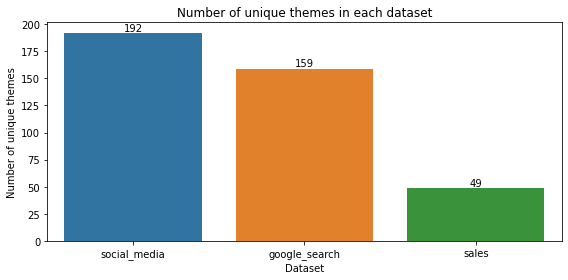

In [27]:
%matplotlib inline
fig=plt.figure(figsize=[8,4])
ax=sns.barplot(x=['social_media','google_search','sales'],y=[len1,len2,len3])
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Number of unique themes in each dataset")
plt.xlabel("Dataset")
plt.ylabel('Number of unique themes')
plt.savefig('fig1.png')
plt.show()

In [28]:
# themes which are not present in google search but present in sales
not_present_themes_1=set(sales_df['claim_name'].unique())-set(google_search_df['claim_name'].unique())
print(len(not_present_themes_1))
print(not_present_themes_1)

19
{'cookie', 'american southwest style', 'red raspberry', 'tilapia', 'apple cinnamon', 'herbs', 'brown ale', 'cherry', 'american gumbo', 'beans', 'cocoa', 'No Claim', 'pizza', 'scallop', 'stroganoff', 'pollock', 'cumin', 'peanut', 'buckwheat'}


In [29]:
#themes which are not present in social media but present in sales
not_present_themes_2=set(sales_df['claim_name'].unique())-set(social_media_df['claim_name'].unique())
print(len(not_present_themes_2))
print(not_present_themes_2)

11
{'stroganoff', 'pollock', 'tilapia', 'cookie', 'cocoa', 'apple cinnamon', 'No Claim', 'american southwest style', 'brown ale', 'pizza', 'buckwheat'}


### Demonstrates: 2

### Emerging themes in Social_data

In [30]:
def intersection(lst1,lst2,lst3):
    return list(set(lst1) & set(lst2) & set(lst3))

In [31]:
social_media_clean['published_month'] = social_media_clean['published_date'].dt.month
social_media_clean['published_year'] = social_media_clean['published_date'].dt.year
group_social_data = social_media_clean.groupby(by=['claim_id','published_year','published_month'])['total_post'].sum().reset_index()
recent_social_data = group_social_data[group_social_data['published_year'] == 2019]
recent_social_data[recent_social_data['claim_id']==158]

claim_id  published_year  published_month  total_post
1340       158            2019                1        1749
1341       158            2019                2        1683
1342       158            2019                3        2022
1343       158            2019                4        1989
1344       158            2019                5        2376
1345       158            2019                6        2095
1346       158            2019                7        2007
1347       158            2019                8        2155
1348       158            2019                9        2781
1349       158            2019               10        8240

In [32]:
themes_social =social_media_df['claim_id'].unique()
themes_sales = sales_df['claim_id'].unique()
themes_search = google_search_df['claim_id'].unique()
main_themes = intersection(themes_search, themes_sales,themes_social)
print(len(main_themes))

30


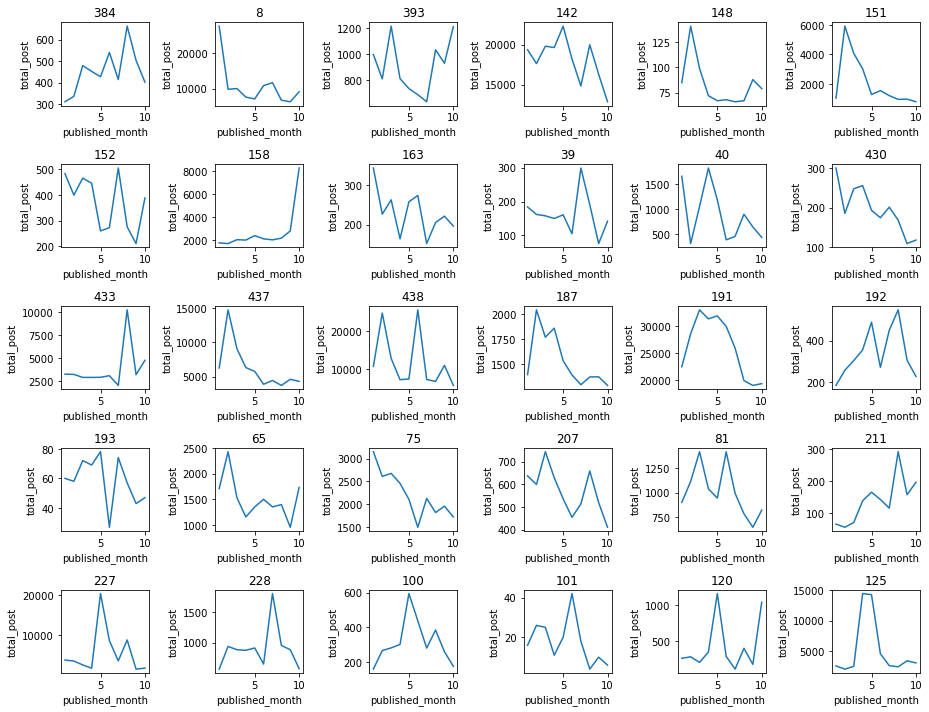

In [33]:
fig, axes = plt.subplots(5,6,figsize=(13, 10))
row =0
col =0
emerging_theme_list= []
for i in range(30):
    df = recent_social_data[recent_social_data['claim_id'] == main_themes[i]]
    # making change columns in the dataframe
    minimum = df['total_post'].min()
    maximum = df['total_post'].max()
    curr = df.iloc[9]['total_post']
    per = (curr - minimum)*100/(maximum -minimum)
    if per > 70:
        emerging_theme_list.append(main_themes[i])
    if col ==6:
        row = row+1
        col =0
    if df.shape[0] !=0:
        sns.lineplot(data=df, x='published_month', y='total_post', ax=axes[row, col]).set(title= main_themes[i])
        col = col +1


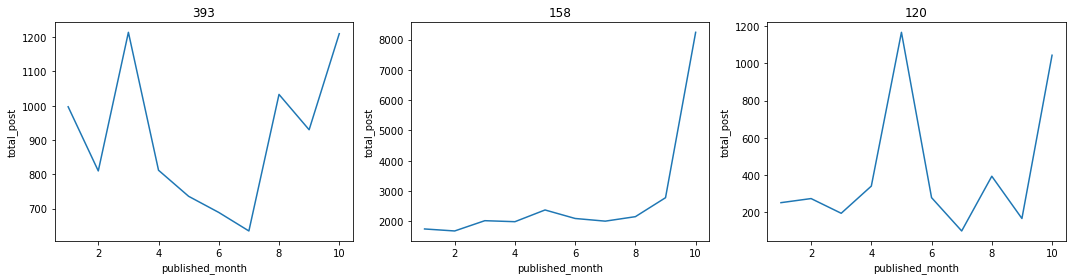

In [34]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
row =0
cols =0
for i in emerging_theme_list:
    if cols ==3:
        cols=0
        row =row+1
    df = recent_social_data[recent_social_data['claim_id'] == i]
    sns.lineplot(data=df, x='published_month', y='total_post', ax=axes[cols]).set(title= i)
    cols =cols +1
plt.savefig('fig_6.png')

In [35]:
emerging_social_dict ={}
for i in emerging_theme_list:
    emerging_social_dict[i] =list(Theme_clean[Theme_clean['claim_id'] == i]['claim_name'])[0]
([emerging_social_dict])


[{393: 'sea salt', 158: 'chicken', 120: 'crab'}]

In [36]:
google_search_df['search_month'] = pd.DatetimeIndex(google_search_df['search_date']).month
google_search_df.drop('search_date', axis=1, inplace=True)
google_search_df.rename(columns ={'year_new':'search_year', 'week_number':'search_week'}, inplace=True)

In [37]:
group_search_data = google_search_df.groupby(by=['claim_id','search_year'])['search_volume'].sum().reset_index()
recent_search_data =  group_search_data.copy()
recent_search_data.head()

claim_id  search_year  search_volume
0         8         2014        2147362
1         8         2015        2390107
2         8         2016        2435585
3         8         2017        1962169
4         8         2018        3431254

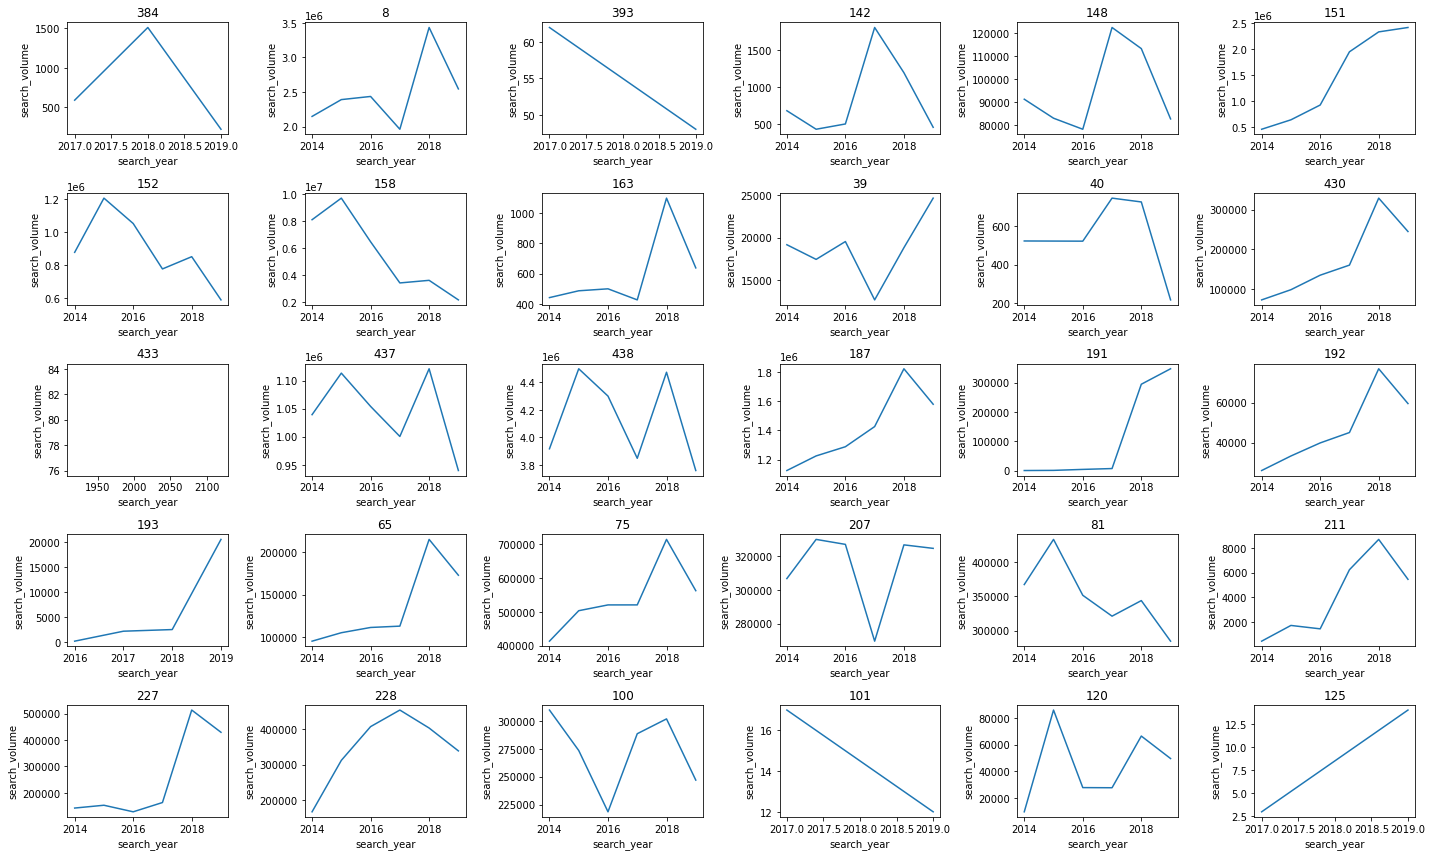

In [38]:
fig, axes = plt.subplots(5,6,figsize=(20, 12))
row =0
col =0
emerging_theme_search= []
for i in range(30):
    df = recent_search_data[recent_search_data['claim_id'] == main_themes[i]]
    shap =df.shape[0]
    # making change columns in the dataframe
    if shap >2:
        prev2 = df.iloc[shap-3]['search_volume']
    prev = df.iloc[shap-2]['search_volume']
    curr = df.iloc[shap-1]['search_volume']
    per = (curr - prev)*100/(prev)
    per2 = (curr - prev2)*100/(prev2)
    if per > 60 or per2 >80:
        emerging_theme_search.append(main_themes[i])
    if col ==6:
        row = row+1
        col =0
    if df.shape[0] !=0:
        sns.lineplot(data=df, x='search_year', y='search_volume', ax=axes[row, col]).set(title= main_themes[i])
        col = col +1

In [39]:
print(emerging_theme_search)

[39, 191, 193, 227, 125]


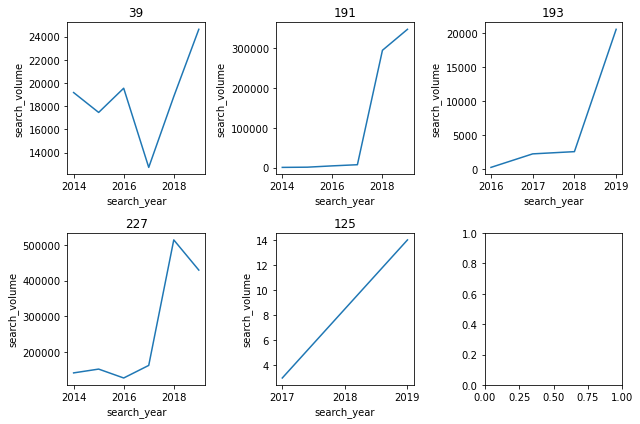

In [40]:
fig, axes = plt.subplots(2,3,figsize=(9,6))
row =0
cols =0
for i in emerging_theme_search:
    if cols ==3:
        cols=0
        row =row+1
    df = recent_search_data[recent_search_data['claim_id'] == i]
    sns.lineplot( data=df, x='search_year', y='search_volume', ax=axes[row, cols]).set(title= i)
    cols =cols +1
plt.savefig('fig_7.png')

In [41]:
emerging_google_search_dict ={}
for i in emerging_theme_search:
    emerging_google_search_dict[i] =list(Theme_clean[Theme_clean['claim_id'] == i]['claim_name'])[0]
print(emerging_google_search_dict)

{39: 'highsource of protein', 191: 'bone health', 193: 'poultry', 227: 'salmon', 125: 'nuts'}


### Emerging Themes in Sales

In [42]:
sales_df

system_calendar_date  product_id  sales_dollars_value  \
0                 2016-01-09           1              13927.0   
1                 2016-01-23           1              12628.0   
2                 2016-02-06           1              11379.0   
3                 2016-01-30           1              11568.0   
4                 2016-02-13           1              10959.0   
...                      ...         ...                  ...   
7767415           2019-09-07       18405               1156.5   
7767416           2019-09-14       18405               1156.5   
7767417           2019-09-21       18405               1156.5   
7767418           2019-09-28       18405               1156.5   
7767419           2019-10-05       18405               1156.5   

         sales_units_value  sales_lbs_value  vendor  claim_id  count  \
0                    934.0          18680.0  Others         0      1   
1                    878.0          17564.0  Others         0      1   
2                    810.0          16200.0  Others         0      1   
3                    821.0          16424.0  Others         0      1   
4                    784.0          15682.0  Others         0      1   
...                    ...              ...     ...       ...    ...   
7767415               45.5            136.5  Others        65      2   
7767416               45.5            136.5  Others        65      2   
7767417               45.5            136.5  Others        65      2   
7767418               45.5            136.5  Others        65      2   
7767419               45.5            136.5  Others        65      2   

                   claim_name  
0                    No Claim  
1                    No Claim  
2                    No Claim  
3                    No Claim  
4                    No Claim  
...                       ...  
7767415  ethical not specific  
7767416  ethical not specific  
7767417  ethical not specific  
7767418  ethical not specific  
7767419  ethical not specific  

[7767420 rows x 9 columns]

In [43]:
sales_df['sale_year'] = pd.DatetimeIndex(sales_df['system_calendar_date']).year
sales_df['sale_month'] = pd.DatetimeIndex(sales_df['system_calendar_date']).month
sales_df['sale_week'] = pd.DatetimeIndex(sales_df['system_calendar_date']).week
sales_df.drop('system_calendar_date', axis =1, inplace =True)

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)


In [44]:
group_sales_data = sales_df.groupby(by=['sale_year','claim_id'])['sales_dollars_value'].sum().reset_index()
recent_sales_data = group_sales_data.copy()
recent_sales_data.head()

sale_year  claim_id  sales_dollars_value
0       2016         0         1.585879e+10
1       2016         8         2.268772e+09
2       2016        15         1.000583e+07
3       2016        16         1.680263e+06
4       2016        32         1.362927e+09

In [45]:
sales_themes =main_themes.remove(393)
sales_themes =main_themes.remove(148)

In [46]:
sales_themes = main_themes
print(sales_themes)

[384, 8, 142, 151, 152, 158, 163, 39, 40, 430, 433, 437, 438, 187, 191, 192, 193, 65, 75, 207, 81, 211, 227, 228, 100, 101, 120, 125]


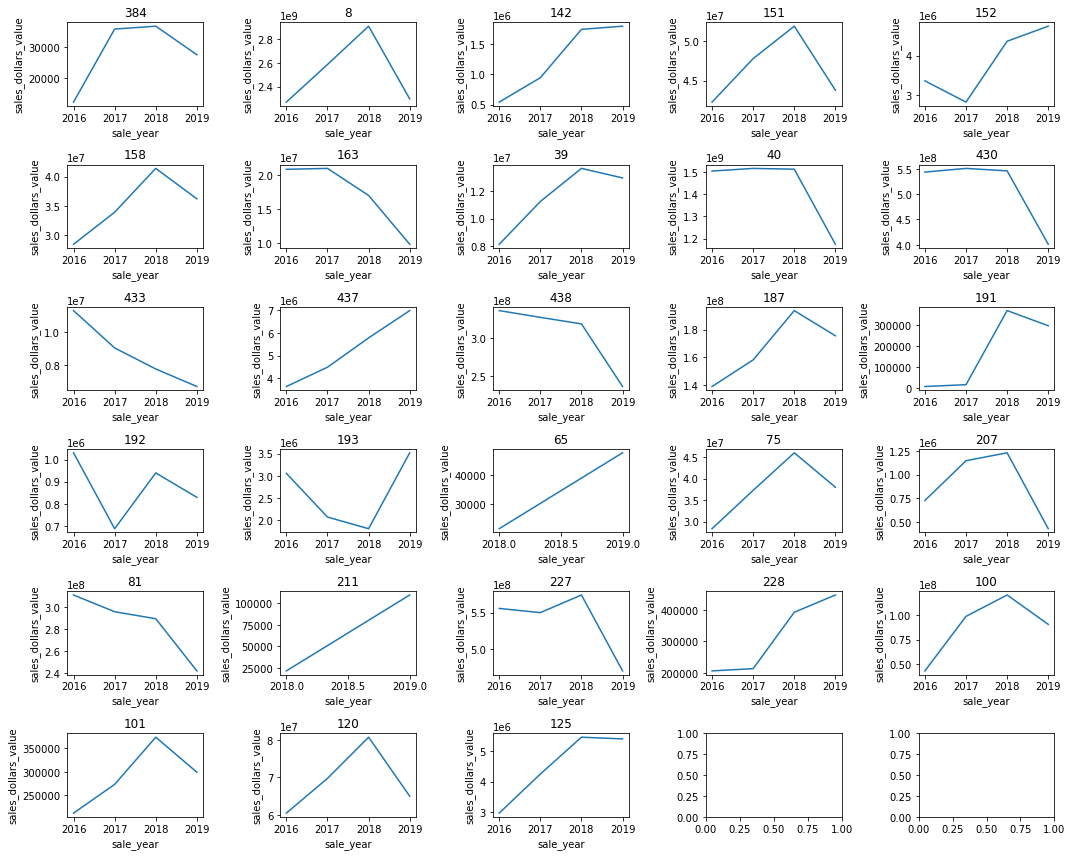

In [47]:
fig, axes = plt.subplots(6,5,figsize=(15, 12))
row =0
col =0
emerging_theme_sales= []
for i in range(28):
    df = recent_sales_data[recent_sales_data['claim_id'] == sales_themes[i]]
    shap =df.shape[0]
    # making change columns in the dataframe
    prev = df.iloc[shap-2]['sales_dollars_value']
    curr = df.iloc[shap-1]['sales_dollars_value']
    per = (curr - prev)*100/(prev)
    if per > 10:
        emerging_theme_sales.append(sales_themes[i])
    if col ==5:
        row = row+1
        col =0
    if df.shape[0] !=0:
        sns.lineplot(data=df, x='sale_year', y='sales_dollars_value', ax=axes[row, col]).set(title= sales_themes[i])
        col = col +1

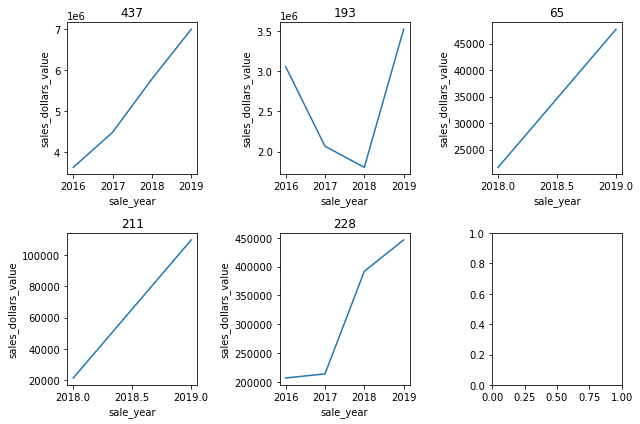

In [48]:
fig, axes = plt.subplots(2,3,figsize=(9,6))
row =0
cols =0
for i in emerging_theme_sales:
    if cols == 3:
        cols=0
        row =row+1
    df = recent_sales_data[recent_sales_data['claim_id'] == i]
    sns.lineplot( data=df, x='sale_year', y='sales_dollars_value', ax=axes[row, cols]).set(title= i)
    cols =cols + 1
plt.savefig('fig_8.png')

In [49]:
emerging_sales_dict ={}
for i in emerging_theme_sales:
    emerging_sales_dict[i] =list(Theme_clean[Theme_clean['claim_id'] == i]['claim_name'])[0]
print(emerging_sales_dict)

{437: 'vegetarian', 193: 'poultry', 65: 'ethical not specific', 211: 'halal', 228: 'beef hamburger'}


### granularity

In [50]:
sales_df

product_id  sales_dollars_value  sales_units_value  sales_lbs_value  \
0                 1              13927.0              934.0          18680.0   
1                 1              12628.0              878.0          17564.0   
2                 1              11379.0              810.0          16200.0   
3                 1              11568.0              821.0          16424.0   
4                 1              10959.0              784.0          15682.0   
...             ...                  ...                ...              ...   
7767415       18405               1156.5               45.5            136.5   
7767416       18405               1156.5               45.5            136.5   
7767417       18405               1156.5               45.5            136.5   
7767418       18405               1156.5               45.5            136.5   
7767419       18405               1156.5               45.5            136.5   

         vendor  claim_id  count            claim_name  sale_year  sale_month  \
0        Others         0      1              No Claim       2016           1   
1        Others         0      1              No Claim       2016           1   
2        Others         0      1              No Claim       2016           2   
3        Others         0      1              No Claim       2016           1   
4        Others         0      1              No Claim       2016           2   
...         ...       ...    ...                   ...        ...         ...   
7767415  Others        65      2  ethical not specific       2019           9   
7767416  Others        65      2  ethical not specific       2019           9   
7767417  Others        65      2  ethical not specific       2019           9   
7767418  Others        65      2  ethical not specific       2019           9   
7767419  Others        65      2  ethical not specific       2019          10   

         sale_week  
0                1  
1                3  
2                5  
3                4  
4                6  
...            ...  
7767415         36  
7767416         37  
7767417         38  
7767418         39  
7767419         40  

[7767420 rows x 11 columns]

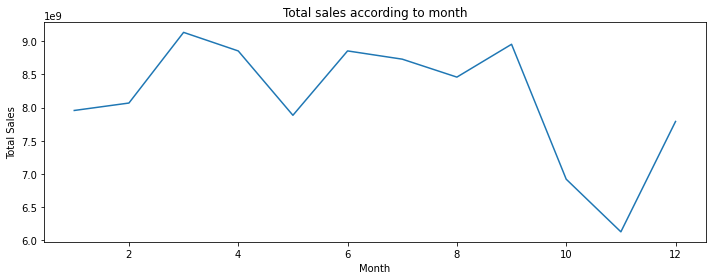

In [51]:
sales_df.groupby(by=['sale_month'])["sales_dollars_value"].sum().plot(figsize=(10,4))
plt.title("Total sales according to month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [52]:
social_media_df

claim_id published_date  total_post claim_name
0            148     2015-10-01          76       tuna
1            148     2015-10-10          31       tuna
2            148     2015-10-11          65       tuna
3            148     2015-10-12          88       tuna
4            148     2015-10-13          85       tuna
...          ...            ...         ...        ...
314874       876     2019-09-05        4658    caramel
314875       876     2019-09-06        3731    caramel
314876       876     2019-09-07        2336    caramel
314877       876     2019-09-08        1374    caramel
314878       876     2019-09-09        1442    caramel

[314879 rows x 4 columns]

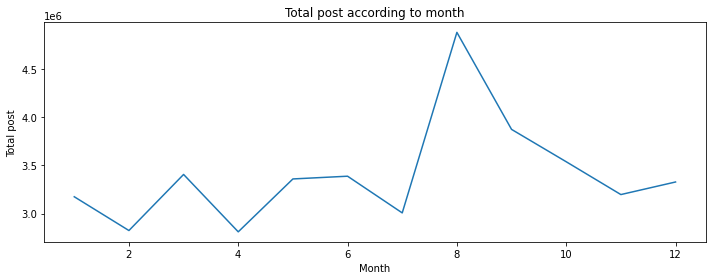

In [53]:
social_media_df.groupby(by=[social_media_df['published_date'].dt.month])["total_post"].sum().plot(figsize=(10,4))
plt.title("Total post according to month")
plt.xlabel("Month")
plt.ylabel("Total post")
plt.show()


In [54]:
google_search_df

platform  search_volume  claim_id  search_week  search_year  \
0        google            349       916            1         2014   
1        google            349       916            2         2014   
2        google            697       916            2         2014   
3        google            349       916            2         2014   
4        google            697       916            4         2014   
...         ...            ...       ...          ...          ...   
181560   google             42       843           30         2019   
181561   google             84       843           39         2019   
181562   amazon            135       606           23         2018   
181563   amazon             39       433            5         2019   
181564   google             41       433           26         2019   

           claim_name  search_month  
0         gluten free             1  
1         gluten free             1  
2         gluten free             1  
3         gluten free             1  
4         gluten free             1  
...               ...           ...  
181560  snickerdoodle             7  
181561  snickerdoodle             9  
181562     hemp seeds             6  
181563    gingerbread             1  
181564    gingerbread             6  

[181565 rows x 7 columns]

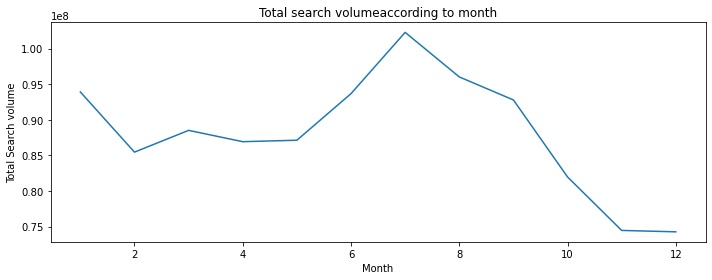

In [55]:
google_search_df.groupby(by=['search_month'])["search_volume"].sum().plot(figsize=(10,4))
plt.title("Total search volumeaccording to month")
plt.xlabel("Month")
plt.ylabel("Total Search volume")
plt.show()


### Merging dataset

In [56]:
sales_manufacturer_Theme_list = pd.merge(sales_manufacturer_Theme_list, Theme_clean, on='claim_id', how='left')

In [57]:
sales_manufacturer_Theme_list.sort_values(['product_id'],inplace=True)

In [58]:
sales_manufacturer_Theme_list['month'] = sales_manufacturer_Theme_list['system_calendar_date'].dt.month

In [59]:
sales_manufacturer_Theme_list['year'] = sales_manufacturer_Theme_list['system_calendar_date'].dt.year
sales_manufacturer_Theme_list['month'] = sales_manufacturer_Theme_list['system_calendar_date'].dt.month
#sales_manufacturer_Theme_list['week'] = sales_manufacturer_Theme_list['system_calendar_date'].dt.week


In [60]:
sales_manufacturer_Theme_list_A=sales_manufacturer_Theme_list[sales_manufacturer_Theme_list['vendor']=='A']

In [61]:
sales_manufacturer_Theme_list_A

system_calendar_date  product_id  sales_dollars_value  \
5667039           2018-07-21         573                  0.0   
5667038           2018-03-10         573                  0.0   
5667037           2017-05-06         573                  0.0   
5667035           2017-02-04         573                  0.0   
5667034           2016-04-02         573                  0.0   
...                      ...         ...                  ...   
7763576           2019-09-21       56804               2254.0   
7763577           2019-09-28       56804               2604.0   
7763578           2019-10-05       56804               2338.0   
7763571           2019-08-17       56804               1686.0   
7763572           2019-08-24       56804               1917.0   

         sales_units_value  sales_lbs_value vendor  claim_id  count  \
5667039                1.0              1.0      A         0      1   
5667038                1.0              1.0      A         0      1   
5667037                1.0              1.0      A         0      1   
5667035                4.0              3.0      A         0      1   
5667034                1.0              1.0      A         0      1   
...                    ...              ...    ...       ...    ...   
7763576              130.0            520.0      A         8      1   
7763577              153.0            612.0      A         8      1   
7763578              134.0            536.0      A         8      1   
7763571               86.0            344.0      A         8      1   
7763572               99.0            396.0      A         8      1   

        claim_name  month  year  
5667039   No Claim      7  2018  
5667038   No Claim      3  2018  
5667037   No Claim      5  2017  
5667035   No Claim      2  2017  
5667034   No Claim      4  2016  
...            ...    ...   ...  
7763576   low carb      9  2019  
7763577   low carb      9  2019  
7763578   low carb     10  2019  
7763571   low carb      8  2019  
7763572   low carb      8  2019  

[811370 rows x 11 columns]

In [62]:
social_media_clean['published_month'] = social_media_clean['published_date'].dt.month
social_media_clean['published_year'] = social_media_clean['published_date'].dt.year
#social_media_clean['week_num'] = social_media_clean['published_date'].dt.week

In [63]:
social_media_clean

claim_id published_date  total_post  published_month  published_year
0            148     2015-10-01          76               10            2015
1            148     2015-10-10          31               10            2015
2            148     2015-10-11          65               10            2015
3            148     2015-10-12          88               10            2015
4            148     2015-10-13          85               10            2015
...          ...            ...         ...              ...             ...
533385       876     2019-09-05        4658                9            2019
533386       876     2019-09-06        3731                9            2019
533387       876     2019-09-07        2336                9            2019
533388       876     2019-09-08        1374                9            2019
533389       876     2019-09-09        1442                9            2019

[314879 rows x 5 columns]

In [64]:
social_claim_unique_list =  list(set(social_media_clean['claim_id'].tolist()))
google_claim_unique_list = list(set(google_search_clean['claim_id'].tolist()))
sales_claim_unique_list = list(set(sales_manufacturer_Theme_list_A['claim_id'].tolist()))

In [65]:
def intersection(lst1,lst2,lst3):
    return list(set(lst1) & set(lst2) & set(lst3))

merged_data = sales_manufacturer_Theme_list_A.loc[sales_manufacturer_Theme_list_A['claim_id'].isin(intersection(sales_claim_unique_list, social_claim_unique_list ,google_claim_unique_list))]
google_search_segregated = google_search_clean.loc[google_search_clean['claim_id'].isin(intersection(sales_claim_unique_list, social_claim_unique_list ,google_claim_unique_list))]
social_media_segregated = social_media_clean.loc[social_media_clean['claim_id'].isin(intersection(sales_claim_unique_list, social_claim_unique_list ,google_claim_unique_list))]

In [66]:
merged_data.drop(columns=['system_calendar_date','count'],axis=1,inplace=True)

In [67]:
merged_data = merged_data.groupby(['claim_id','year','month']).sum()
social_media_segregated = social_media_segregated.groupby(['published_year','published_month','claim_id']).sum()
social_media_segregated.reset_index(inplace=True)
merged_data.reset_index(inplace=True)

In [68]:
merged_data

claim_id  year  month  product_id  sales_dollars_value  \
0           8  2016      1    25957795         2.152295e+07   
1           8  2016      2    26039738         2.262099e+07   
2           8  2016      3    26394135         2.380360e+07   
3           8  2016      4    33240530         2.955067e+07   
4           8  2016      5    27702799         2.333330e+07   
..        ...   ...    ...         ...                  ...   
760       438  2019      6     4674485         8.700219e+06   
761       438  2019      7     3747748         7.169116e+06   
762       438  2019      8     4727346         9.196013e+06   
763       438  2019      9     3712868         7.252758e+06   
764       438  2019     10      927946         1.840618e+06   

     sales_units_value  sales_lbs_value  
0         4.951640e+06     6.825220e+06  
1         5.255195e+06     7.236211e+06  
2         5.451475e+06     7.586749e+06  
3         6.770683e+06     9.422957e+06  
4         5.305341e+06     7.257479e+06  
..                 ...              ...  
760       3.280148e+05     5.730802e+06  
761       2.701963e+05     4.675566e+06  
762       3.442072e+05     6.049500e+06  
763       2.708292e+05     4.748201e+06  
764       6.852817e+04     1.199558e+06  

[765 rows x 7 columns]

In [69]:
social_media_segregated_1=social_media_segregated[social_media_segregated['published_year']!=2015 ]
social_media_segregated_2=social_media_segregated[social_media_segregated['published_year']==2015]
social_media_segregated_3 =social_media_segregated_2[social_media_segregated_2['published_month']==12]

In [70]:
social_media_segregated_1=pd.concat([social_media_segregated_1,social_media_segregated_3],axis=0)

In [71]:
social_media_segregated_1

published_year  published_month  claim_id  total_post
152            2016                1         8        6321
153            2016                1        39          63
154            2016                1        40         157
155            2016                1        75        1472
156            2016                1        81        1607
..              ...              ...       ...         ...
147            2015               12       228         356
148            2015               12       430         214
149            2015               12       433        3194
150            2015               12       437        1991
151            2015               12       438        6789

[893 rows x 4 columns]

#### Social_media


In [72]:
trail_data_1 = pd.merge(merged_data,social_media_segregated_1,on='claim_id',how='inner')

In [73]:
new_dataset_df = trail_data_1.copy()

In [74]:
trail_data_2 = trail_data_1[(trail_data_1['year'] == trail_data_1['published_year']) & 
                          (trail_data_1['published_month'] == (trail_data_1['month']-2))&
                          (trail_data_1['month']!=1)]
trail_data_3 = trail_data_1[(trail_data_1['year'] == trail_data_1['published_year']) & 
                          (trail_data_1['published_month'] == (trail_data_1['month']-3))&
                          (trail_data_1['month']!=1)]
trail_data_4 = trail_data_1[(trail_data_1['year'] == (trail_data_1['published_year']+1)) &
                            ((trail_data_1['published_month']==11) | (trail_data_1['published_month']==12))& (trail_data_1['month']==2)]
trail_data_5 = trail_data_1[(trail_data_1['year'] == (trail_data_1['published_year']+1)) &
                            ((trail_data_1['published_month']==10) | (trail_data_1['published_month']==11))& (trail_data_1['month']==1)] 
trail_data_6 = trail_data_1[(trail_data_1['year'] == (trail_data_1['published_year']+1)) &
                            (trail_data_1['published_month']==12) & (trail_data_1['month']==3)]

In [75]:
trail_data_7 = pd.concat([trail_data_2,trail_data_3,trail_data_4,trail_data_5,trail_data_6],axis=0)

In [76]:
trail_data_8 = trail_data_7.groupby(['year','month','claim_id'])['total_post'].sum().reset_index()

In [77]:
trail_data_8

year  month  claim_id  total_post
0    2016      2         8        4172
1    2016      2        39          43
2    2016      2        40         146
3    2016      2        75        1252
4    2016      2        81        1429
..    ...    ...       ...         ...
744  2019     10       228        2766
745  2019     10       430         369
746  2019     10       433       12275
747  2019     10       437        8138
748  2019     10       438       14131

[749 rows x 4 columns]

In [78]:
merged_trail_data_1 = pd.merge(merged_data,trail_data_8,on = ['claim_id','year','month'],how='inner')
merged_trail_data_1


claim_id  year  month  product_id  sales_dollars_value  \
0           8  2016      2    26039738         2.262099e+07   
1           8  2016      3    26394135         2.380360e+07   
2           8  2016      4    33240530         2.955067e+07   
3           8  2016      5    27702799         2.333330e+07   
4           8  2016      6    28125185         2.384512e+07   
..        ...   ...    ...         ...                  ...   
744       438  2019      6     4674485         8.700219e+06   
745       438  2019      7     3747748         7.169116e+06   
746       438  2019      8     4727346         9.196013e+06   
747       438  2019      9     3712868         7.252758e+06   
748       438  2019     10      927946         1.840618e+06   

     sales_units_value  sales_lbs_value  total_post  
0         5.255195e+06     7.236211e+06        4172  
1         5.451475e+06     7.586749e+06       10493  
2         6.770683e+06     9.422957e+06       12671  
3         5.305341e+06     7.257479e+06       12830  
4         5.585290e+06     7.543141e+06       13588  
..                 ...              ...         ...  
744       3.280148e+05     5.730802e+06       20178  
745       2.701963e+05     4.675566e+06       14724  
746       3.442072e+05     6.049500e+06       33138  
747       2.708292e+05     4.748201e+06       33004  
748       6.852817e+04     1.199558e+06       14131  

[749 rows x 8 columns]

#### google data

In [79]:
google_search_segregated_1 = google_search_segregated[google_search_segregated['year_new']!=2014]
google_search_segregated_1 = google_search_segregated_1[google_search_segregated_1['year_new']!=2015]
google_search_segregated_2 = google_search_segregated[google_search_segregated['year_new']==2015]
google_search_segregated_2 = google_search_segregated_2[google_search_segregated_2['week_number']==52]

In [80]:
google_search_segregated_1

search_date platform  search_volume  claim_id  week_number  year_new
21035   2015-12-28   google           7503         8           53      2016
21036   2015-12-29   google           6740         8           53      2016
21037   2015-12-30   google           8774         8           53      2016
21038   2015-12-31   google           6486         8           53      2016
23074   2015-12-28   google           2028       151           53      2016
...            ...      ...            ...       ...          ...       ...
181505  2019-08-18  walmart             42        75           33      2019
181506  2019-08-31  walmart             42        75           35      2019
181507  2019-09-08  walmart            167        75           36      2019
181508  2019-09-28  walmart             42        75           39      2019
181511  2019-07-11  walmart             42       227           28      2019

[24724 rows x 6 columns]

In [81]:
google_search_segregated_1 = pd.concat([google_search_segregated_1,google_search_segregated_2])
google_search_segregated_1['search_month'] = google_search_segregated_1['search_date'].dt.month


In [82]:
group_search_data = google_search_segregated_1.groupby(by = ['year_new', 'search_month', 'claim_id'])['search_volume'].sum().reset_index()
group_search_data.head()

year_new  search_month  claim_id  search_volume
0      2015            12         8          42093
1      2015            12        39            632
2      2015            12        75           6874
3      2015            12        81           8616
4      2015            12       120           1687

In [83]:
sea_data_1 = pd.merge(merged_data,group_search_data,on='claim_id',how='inner')

In [84]:
sea_data_1


claim_id  year  month  product_id  sales_dollars_value  \
0             8  2016      1    25957795         2.152295e+07   
1             8  2016      1    25957795         2.152295e+07   
2             8  2016      1    25957795         2.152295e+07   
3             8  2016      1    25957795         2.152295e+07   
4             8  2016      1    25957795         2.152295e+07   
...         ...   ...    ...         ...                  ...   
32000       438  2019     10      927946         1.840618e+06   
32001       438  2019     10      927946         1.840618e+06   
32002       438  2019     10      927946         1.840618e+06   
32003       438  2019     10      927946         1.840618e+06   
32004       438  2019     10      927946         1.840618e+06   

       sales_units_value  sales_lbs_value  year_new  search_month  \
0           4.951640e+06     6.825220e+06      2015            12   
1           4.951640e+06     6.825220e+06      2016             1   
2           4.951640e+06     6.825220e+06      2016             2   
3           4.951640e+06     6.825220e+06      2016             3   
4           4.951640e+06     6.825220e+06      2016             4   
...                  ...              ...       ...           ...   
32000       6.852817e+04     1.199558e+06      2019             7   
32001       6.852817e+04     1.199558e+06      2019             8   
32002       6.852817e+04     1.199558e+06      2019             9   
32003       6.852817e+04     1.199558e+06      2019            10   
32004       6.852817e+04     1.199558e+06      2019            12   

       search_volume  
0              42093  
1             221141  
2             238179  
3             205629  
4             216691  
...              ...  
32000         444540  
32001         425867  
32002         420153  
32003          12938  
32004          13416  

[32005 rows x 10 columns]

In [85]:
sea_data_2 = sea_data_1[(sea_data_1['year'] == sea_data_1['year_new']) & 
                          (sea_data_1['search_month'] == (sea_data_1['month']-1))&
                          (sea_data_1['month']!=1)]
sea_data_3 = sea_data_1[(sea_data_1['year'] == sea_data_1['year_new']) & 
                          (sea_data_1['search_month'] == (sea_data_1['month']-2))&
                          (sea_data_1['month']!=1)]
sea_data_4 = sea_data_1[(sea_data_1['year'] == (sea_data_1['year_new']+1)) &
                           ( (sea_data_1['search_month']==12)|(sea_data_1['search_month']==11))& (sea_data_1['month']==1)]
sea_data_5 = sea_data_1[(sea_data_1['year'] == (sea_data_1['year_new']+1))&
                         (sea_data_1['search_month']==12)& (sea_data_1['month']==2)]

In [86]:
sea_data_6 = pd.concat([sea_data_2,sea_data_3,sea_data_4,sea_data_5])

In [87]:
sea_data_7 = sea_data_6.groupby(['year','month','claim_id'])['search_volume'].sum().reset_index()
sea_data_7

year  month  claim_id  search_volume
0    2016      1         8          42093
1    2016      1        39            632
2    2016      1        75           6874
3    2016      1        81           8616
4    2016      1       120           1687
..    ...    ...       ...            ...
685  2019     10       227          62606
686  2019     10       228          90084
687  2019     10       430          60395
688  2019     10       437         202187
689  2019     10       438         846020

[690 rows x 4 columns]

In [88]:
merged_trail_data_2 = pd.merge(merged_trail_data_1,sea_data_7,on = ['claim_id','year','month'],how='inner')

In [89]:
merged_trail_data_2

claim_id  year  month  product_id  sales_dollars_value  \
0           8  2016      2    26039738         2.262099e+07   
1           8  2016      3    26394135         2.380360e+07   
2           8  2016      4    33240530         2.955067e+07   
3           8  2016      5    27702799         2.333330e+07   
4           8  2016      6    28125185         2.384512e+07   
..        ...   ...    ...         ...                  ...   
673       438  2019      6     4674485         8.700219e+06   
674       438  2019      7     3747748         7.169116e+06   
675       438  2019      8     4727346         9.196013e+06   
676       438  2019      9     3712868         7.252758e+06   
677       438  2019     10      927946         1.840618e+06   

     sales_units_value  sales_lbs_value  total_post  search_volume  
0         5.255195e+06     7.236211e+06        4172         263234  
1         5.451475e+06     7.586749e+06       10493         459320  
2         6.770683e+06     9.422957e+06       12671         443808  
3         5.305341e+06     7.257479e+06       12830         422320  
4         5.585290e+06     7.543141e+06       13588         428808  
..                 ...              ...         ...            ...  
673       3.280148e+05     5.730802e+06       20178         819404  
674       2.701963e+05     4.675566e+06       14724         846478  
675       3.442072e+05     6.049500e+06       33138         868055  
676       2.708292e+05     4.748201e+06       33004         870407  
677       6.852817e+04     1.199558e+06       14131         846020  

[678 rows x 9 columns]

In [90]:
merged_trail_data_2 = pd.merge(merged_trail_data_2 , Theme_clean , on='claim_id' , how='inner')
merged_trail_data_2.drop(columns=['product_id'] , axis=1,inplace=True)

In [91]:
merged_trail_data_2

claim_id  year  month  sales_dollars_value  sales_units_value  \
0           8  2016      2         2.262099e+07       5.255195e+06   
1           8  2016      3         2.380360e+07       5.451475e+06   
2           8  2016      4         2.955067e+07       6.770683e+06   
3           8  2016      5         2.333330e+07       5.305341e+06   
4           8  2016      6         2.384512e+07       5.585290e+06   
..        ...   ...    ...                  ...                ...   
673       438  2019      6         8.700219e+06       3.280148e+05   
674       438  2019      7         7.169116e+06       2.701963e+05   
675       438  2019      8         9.196013e+06       3.442072e+05   
676       438  2019      9         7.252758e+06       2.708292e+05   
677       438  2019     10         1.840618e+06       6.852817e+04   

     sales_lbs_value  total_post  search_volume       claim_name  
0       7.236211e+06        4172         263234         low carb  
1       7.586749e+06       10493         459320         low carb  
2       9.422957e+06       12671         443808         low carb  
3       7.257479e+06       12830         422320         low carb  
4       7.543141e+06       13588         428808         low carb  
..               ...         ...            ...              ...  
673     5.730802e+06       20178         819404  ethnic & exotic  
674     4.675566e+06       14724         846478  ethnic & exotic  
675     6.049500e+06       33138         868055  ethnic & exotic  
676     4.748201e+06       33004         870407  ethnic & exotic  
677     1.199558e+06       14131         846020  ethnic & exotic  

[678 rows x 9 columns]

### Competitor

In [92]:
dummy = sales_manufacturer_Theme_list
t1 =dummy.groupby(['vendor','claim_id']).sum().reset_index()
t2 = t1[t1['claim_id']==8]
t2[['claim_id','vendor', 'sales_dollars_value']]

claim_id         vendor  sales_dollars_value
1           8              A         1.488624e+09
33          8              B         3.705649e+08
60          8              D         1.367581e+09
79          8              F         6.980484e+08
103         8              H         1.555487e+07
126         8         Others         4.891582e+09
173         8  Private Label         1.232395e+09

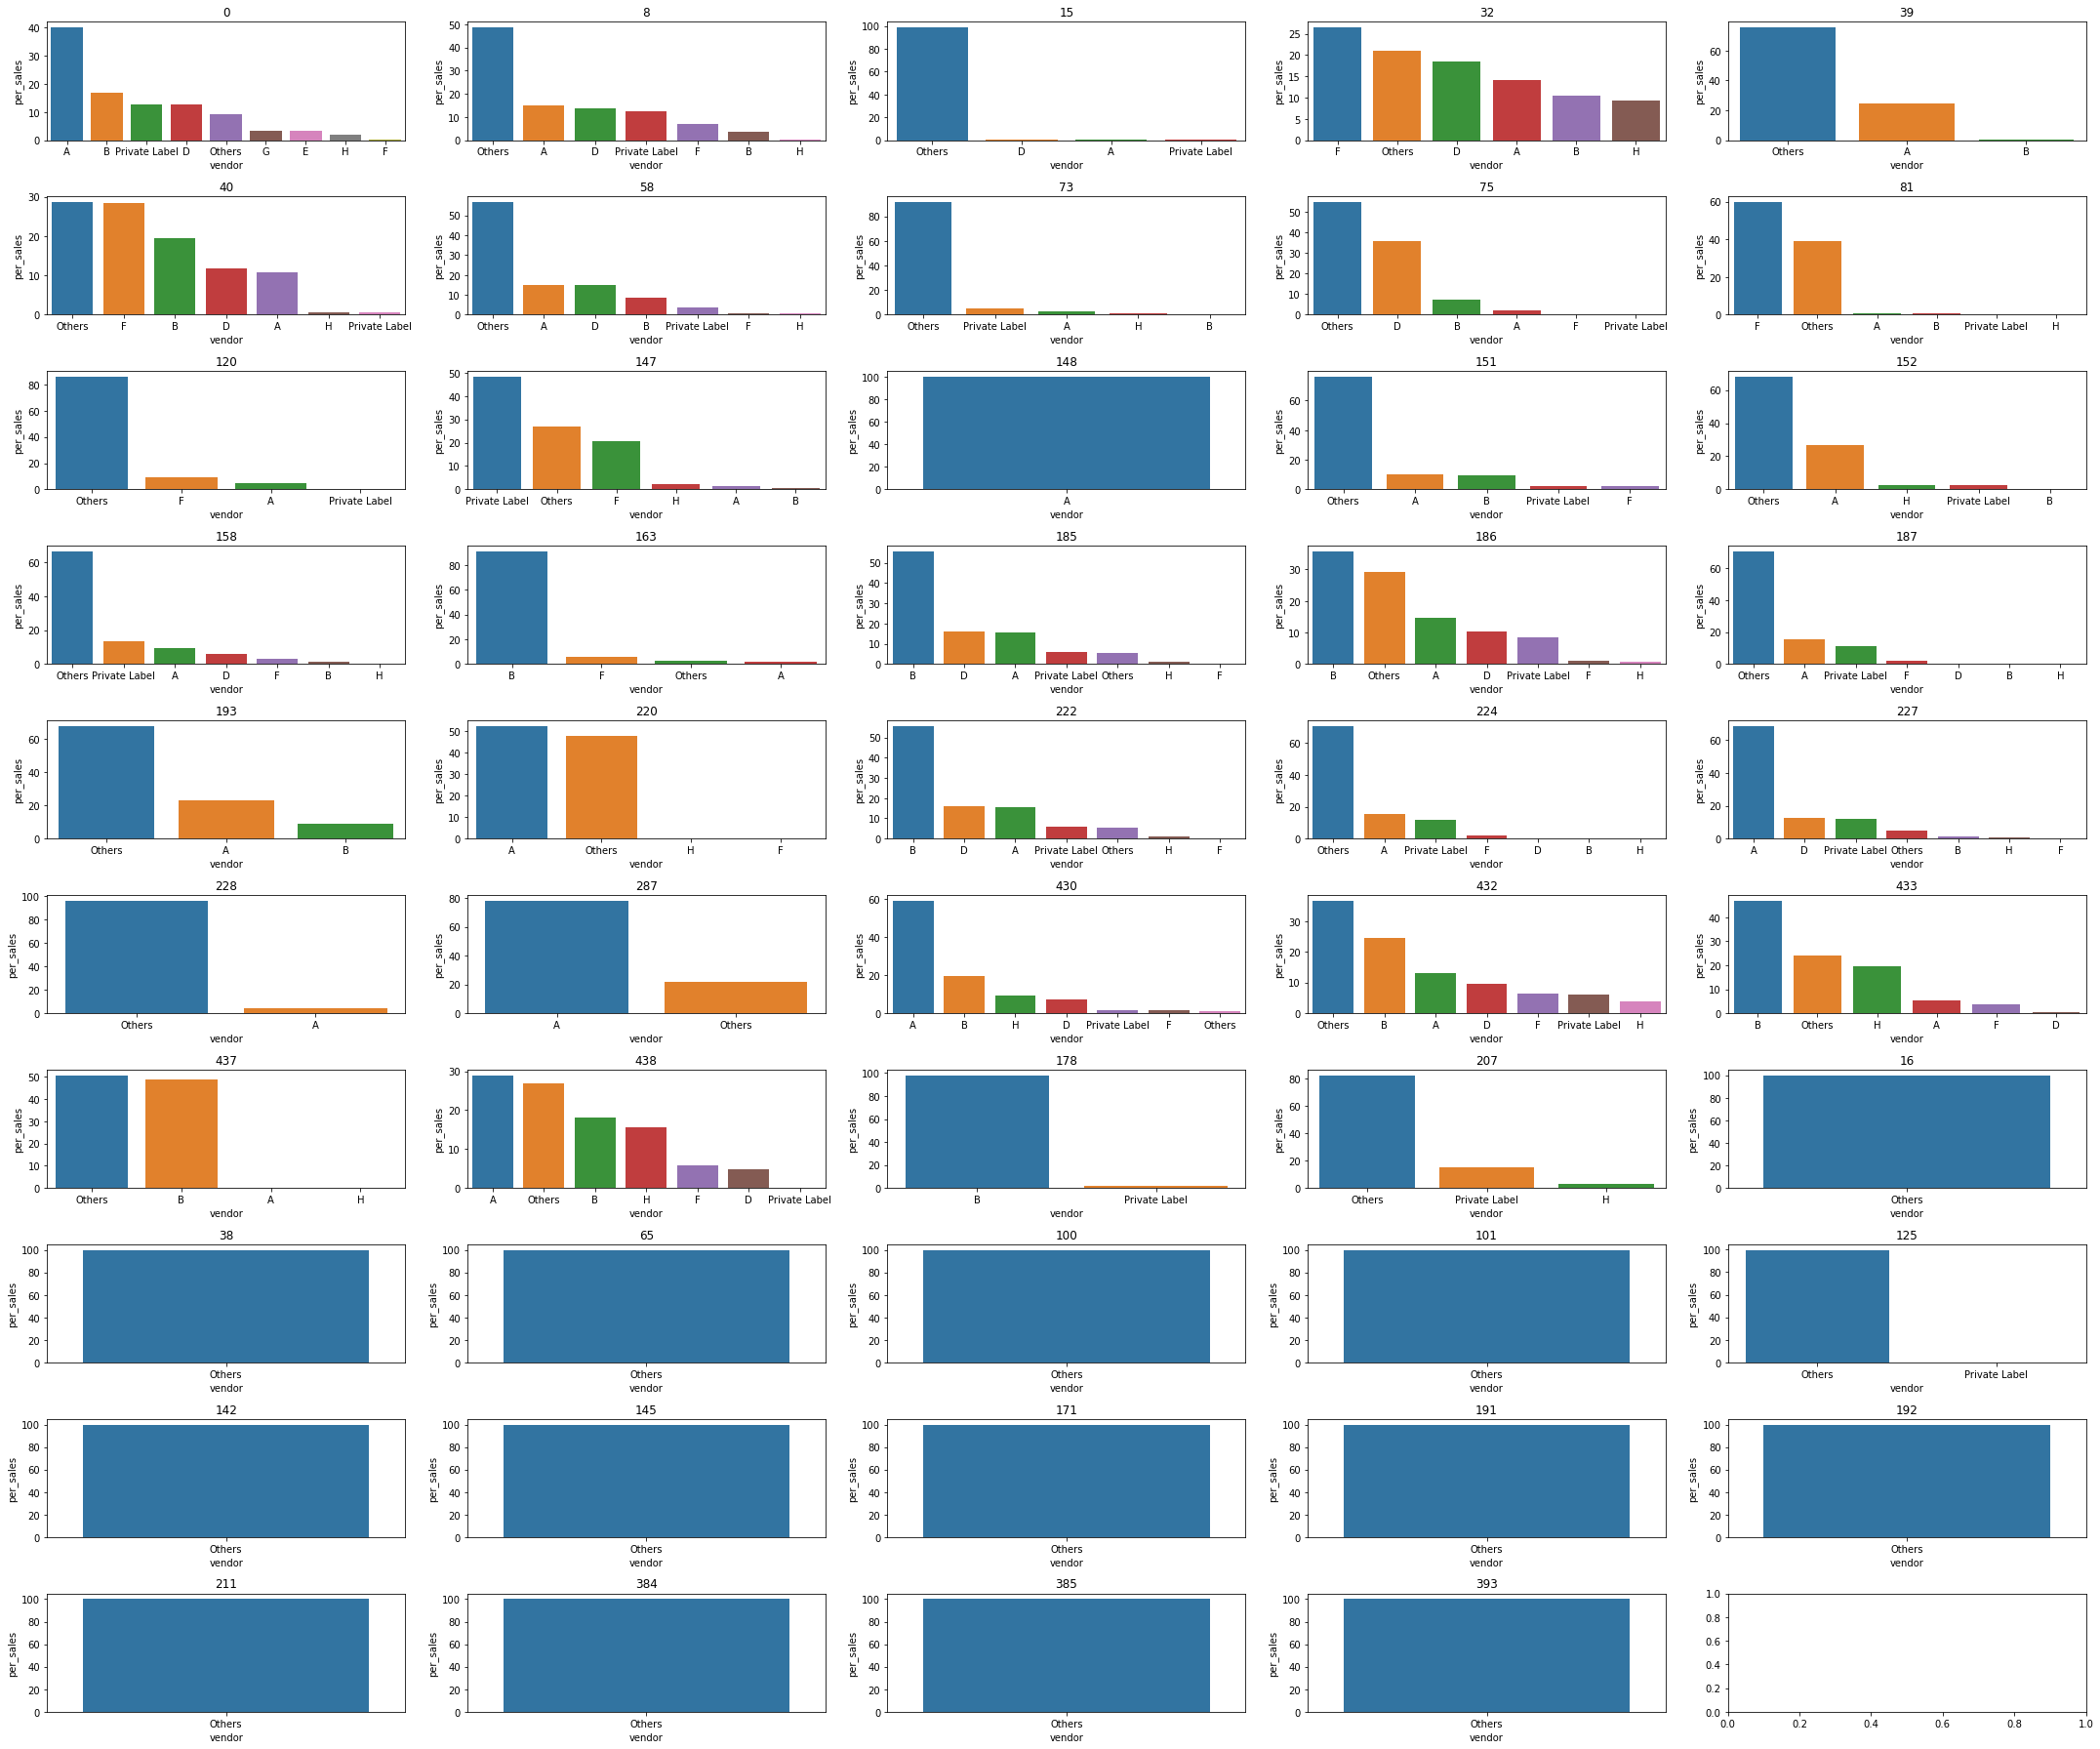

In [93]:
claim_list = list(t1['claim_id'].unique())
competetors_dict = {}

#plot
fig, axes = plt.subplots(10,5,figsize=(30,25))
row =0
col =0

#loop
for i in claim_list:
    df = t1[t1['claim_id'] ==i]
    df['per_sales'] = df['sales_dollars_value']*100/(df['sales_dollars_value'].sum())
    df.sort_values('per_sales',ascending =False, inplace=True)
    if col ==5:
        row = row+1
        col =0
    if df.shape[0] !=0:
        sns.barplot(data=df, x='vendor', y='per_sales', ax=axes[row, col]).set(title= i)
        col = col +1
#competetors_list_df = pd.DataFrame(list(competetors_dict.items()), columns =['claim_id','competitor'] )

In [94]:
claim_list = list(t1['claim_id'].unique())
competetors_dict = {}

for i in claim_list:
    df = t1[t1['claim_id'] ==i]
    df['per_sales'] = df['sales_dollars_value']*100/(df['sales_dollars_value'].sum())
    df.sort_values('per_sales',ascending =False, inplace=True)
    
    if 'A' not in df['vendor'].tolist():
        competetors_dict[i] = 'No Products'
    else:
        A_sales_df = df[df['vendor']=='A']['per_sales'].reset_index()
        A_sales = A_sales_df.iloc[0]['per_sales']
        thresh = A_sales-10
        df2=df[df['per_sales']> thresh]
        df2.reset_index()
       
        com_list = df2['vendor'].tolist()
        com_list.remove('A')
        if 'Others' in com_list:
            com_list.remove('Others')
        if len(com_list) !=0:
            competetors_dict[i] = com_list
        else:
            competetors_dict[i] = ['No competition']
        
    
competetors_list_df = pd.DataFrame(list(competetors_dict.items()), columns =['claim_id','competitor'] )

In [95]:
#competetors_list_df = pd.merge(Theme_clean,competetors_list_df, how ='inner', on ='claim_id')
comp_list_df = competetors_list_df[competetors_list_df['competitor']!= 'No Products']
comp_list_df.to_csv('competitor_list.csv')

In [96]:
comp_dict = {}
for i in comp_list_df["competitor"]:
    for j in i:
        if j not in comp_list_df:
            comp_dict[j] = 1
        else:
            comp_dict[j] += 1

In [97]:
comp_dict

{'No competition': 1, 'D': 1, 'Private Label': 1, 'F': 1, 'B': 1, 'H': 1}

In [98]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [99]:
to_1D(comp_list_df["competitor"]).value_counts()

B                 16
Private Label     15
D                 12
F                 12
No competition    11
H                  8
dtype: int64

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


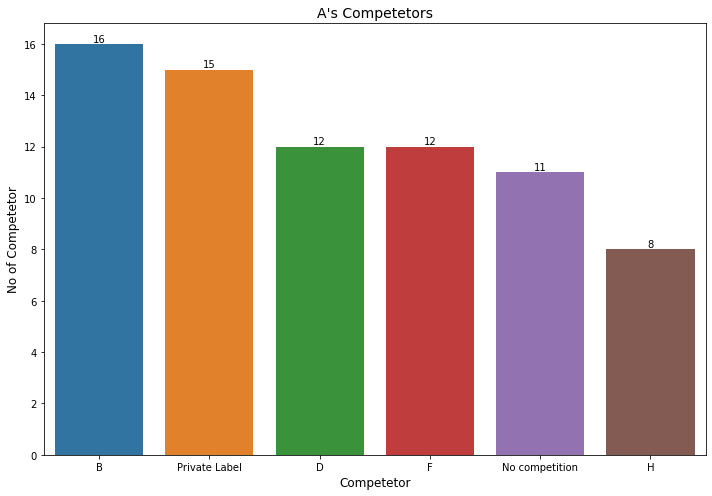

In [100]:
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(to_1D(comp_list_df["competitor"]).value_counts().index,
            to_1D(comp_list_df["competitor"]).value_counts().values)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_ylabel("No of Competetor", size = 12)
ax.set_xlabel("Competetor", size = 12)
ax.set_title("A's Competetors", size = 14)
plt.savefig('fig-5.png')

In [101]:
li = merged_trail_data_2['claim_id'].unique()
top_comp = competetors_list_df[competetors_list_df['claim_id'].isin(li)].reset_index()
top_comp.drop('index', axis =1, inplace =True)

In [102]:
compe_list =[]
for i in range(top_comp.shape[0]):
    for j in (top_comp.iloc[i]['competitor']):
        if j not in compe_list:
            compe_list.append(j)

In [103]:
final_merged_data = pd.merge(merged_trail_data_2 ,competetors_list_df , on = 'claim_id' , how='inner')
final_merged_data

claim_id  year  month  sales_dollars_value  sales_units_value  \
0           8  2016      2         2.262099e+07       5.255195e+06   
1           8  2016      3         2.380360e+07       5.451475e+06   
2           8  2016      4         2.955067e+07       6.770683e+06   
3           8  2016      5         2.333330e+07       5.305341e+06   
4           8  2016      6         2.384512e+07       5.585290e+06   
..        ...   ...    ...                  ...                ...   
673       438  2019      6         8.700219e+06       3.280148e+05   
674       438  2019      7         7.169116e+06       2.701963e+05   
675       438  2019      8         9.196013e+06       3.442072e+05   
676       438  2019      9         7.252758e+06       2.708292e+05   
677       438  2019     10         1.840618e+06       6.852817e+04   

     sales_lbs_value  total_post  search_volume       claim_name  \
0       7.236211e+06        4172         263234         low carb   
1       7.586749e+06       10493         459320         low carb   
2       9.422957e+06       12671         443808         low carb   
3       7.257479e+06       12830         422320         low carb   
4       7.543141e+06       13588         428808         low carb   
..               ...         ...            ...              ...   
673     5.730802e+06       20178         819404  ethnic & exotic   
674     4.675566e+06       14724         846478  ethnic & exotic   
675     6.049500e+06       33138         868055  ethnic & exotic   
676     4.748201e+06       33004         870407  ethnic & exotic   
677     1.199558e+06       14131         846020  ethnic & exotic   

                competitor  
0    [D, Private Label, F]  
1    [D, Private Label, F]  
2    [D, Private Label, F]  
3    [D, Private Label, F]  
4    [D, Private Label, F]  
..                     ...  
673       [No competition]  
674       [No competition]  
675       [No competition]  
676       [No competition]  
677       [No competition]  

[678 rows x 10 columns]

In [104]:
for i in compe_list:
    final_merged_data[i] =0

In [105]:
f_data = final_merged_data.copy()

In [106]:
for col in compe_list:
    for i in range(f_data.shape[0]):
        if col in f_data.iloc[i]['competitor']:
                f_data.loc[i,col]=1

In [107]:
f_data.drop('competitor', axis =1, inplace=True)


In [108]:
f_data

claim_id  year  month  sales_dollars_value  sales_units_value  \
0           8  2016      2         2.262099e+07       5.255195e+06   
1           8  2016      3         2.380360e+07       5.451475e+06   
2           8  2016      4         2.955067e+07       6.770683e+06   
3           8  2016      5         2.333330e+07       5.305341e+06   
4           8  2016      6         2.384512e+07       5.585290e+06   
..        ...   ...    ...                  ...                ...   
673       438  2019      6         8.700219e+06       3.280148e+05   
674       438  2019      7         7.169116e+06       2.701963e+05   
675       438  2019      8         9.196013e+06       3.442072e+05   
676       438  2019      9         7.252758e+06       2.708292e+05   
677       438  2019     10         1.840618e+06       6.852817e+04   

     sales_lbs_value  total_post  search_volume       claim_name  D  \
0       7.236211e+06        4172         263234         low carb  1   
1       7.586749e+06       10493         459320         low carb  1   
2       9.422957e+06       12671         443808         low carb  1   
3       7.257479e+06       12830         422320         low carb  1   
4       7.543141e+06       13588         428808         low carb  1   
..               ...         ...            ...              ... ..   
673     5.730802e+06       20178         819404  ethnic & exotic  0   
674     4.675566e+06       14724         846478  ethnic & exotic  0   
675     6.049500e+06       33138         868055  ethnic & exotic  0   
676     4.748201e+06       33004         870407  ethnic & exotic  0   
677     1.199558e+06       14131         846020  ethnic & exotic  0   

     Private Label  F  No competition  B  H  
0                1  1               0  0  0  
1                1  1               0  0  0  
2                1  1               0  0  0  
3                1  1               0  0  0  
4                1  1               0  0  0  
..             ... ..             ... .. ..  
673              0  0               1  0  0  
674              0  0               1  0  0  
675              0  0               1  0  0  
676              0  0               1  0  0  
677              0  0               1  0  0  

[678 rows x 15 columns]

#### ●	Provide the list of themes available across all data sources

In [109]:
%matplotlib inline
unique_theme_list_used = google_search_clean['claim_id'].tolist()
unique_theme_list_used = unique_theme_list_used + social_media_clean['claim_id'].tolist()
unique_theme_list_used = unique_theme_list_used + Theme_product_clean['claim_id'].tolist()
unique_theme_list = list(set(Theme_clean['claim_id'].tolist()))
unique_theme_list_used = list(set(unique_theme_list))


if len(unique_theme_list_used) == len(unique_theme_list) :
    print("All Themes were used")
else:
    print("{} claim_id were missing".format(unique_theme_list - unique_theme_list_used ))

All Themes were used


In [110]:
google_search_theme_list_df = pd.merge(google_search_clean, Theme_clean, on='claim_id',how='inner')
table = pd.pivot_table(google_search_theme_list_df, values='claim_name', index=['platform'], aggfunc=pd.Series.nunique)
table.reset_index(inplace=True)

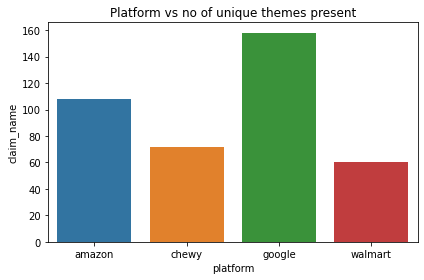

In [111]:
sns.barplot(x="platform", y="claim_name", data=table)
plt.title('Platform vs no of unique themes present')
plt.savefig('fig-1.png')

In [112]:
A1 =len(set( google_search_clean['claim_id'].tolist()))
A2 = len(set( social_media_clean['claim_id'].tolist()))
A3 = len(set( Theme_clean['claim_id'].tolist()))
A4 = len(set( Theme_product_clean['claim_id'].tolist()))
print('no of Themes used in Google_search is\t\t:',A1)
print('no of Themes used in social_media is\t\t:' ,A2)
print('no of Themes used in Theme is\t \t\t:',A3)
print('no of Themes used in  Theme_product_clean is \t:',A4)

no of Themes used in Google_search is		: 160
no of Themes used in social_media is		: 193
no of Themes used in Theme is	 		: 208
no of Themes used in  Theme_product_clean is 	: 51


#### ●	Understands consumer preference(themes) available in each data source

In [113]:
Theme_preference = google_search_theme_list_df.groupby(['claim_name']).sum()['search_volume']
Theme_preference = Theme_preference.reset_index()
Theme_preference['percentage_of_search_volume'] = Theme_preference['search_volume']/Theme_preference['search_volume'].sum()*100

In [114]:
Theme_preference.sort_values('percentage_of_search_volume',ascending=False).head(10)

claim_name  search_volume  percentage_of_search_volume
50   ethical environment      113502487                    10.734959
132               shrimp       77711760                     7.349906
143           sugar free       74588723                     7.054532
76                 honey       73957180                     6.994801
67                health       59537486                     5.631000
71                herbal       52093564                     4.926961
41              diabetic       46258132                     4.375051
12                  boar       45580767                     4.310986
82          lactose free       37254667                     3.523512
119              pumpkin       35277182                     3.336483

In [115]:
sales_product_list = pd.merge(Theme_product_clean, sales_clean, on='product_id', how='inner')
sales_product_Theme_list = pd.merge(sales_product_list, Theme_clean, on='claim_id', how='inner')
table = sales_product_Theme_list.groupby('claim_name').sum()['sales_dollars_value']
#table.reset_index(inplace=True)
table.sort_values(ascending=False).head(10)
#table

claim_name
No Claim                     58767138000
low carb                     18625656906
no additivespreservatives    14388211080
stroganoff                   12757799065
apple cinnamon                8094532727
pollock                       7007307047
cookie                        4254113293
pizza                         4254113293
gmo free                      3859459172
american southwest style      3137484698
Name: sales_dollars_value, dtype: int64

In [116]:
#social_media_Theme_list_df = pd.merge(, sales_clean, on='product_id', how='inner')

### Product_manufacturer_list + sales_data

In [117]:
sales_manufacturer_list_df = pd.merge(manufacturer_clean, sales_clean, on='product_id', how='inner')

In [118]:
market_share = sales_manufacturer_list_df.groupby('vendor').sum()['sales_dollars_value'].reset_index()
total_sales = sales_manufacturer_list_df['sales_dollars_value'].sum()
market_share['market_share']= market_share['sales_dollars_value']/total_sales*100
market_share.drop(['sales_dollars_value'],axis=1,inplace=True)

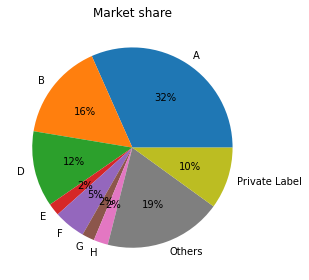

In [119]:
#market_share.plot.pie(y='market_share')
plt.pie(market_share['market_share'].tolist(), labels=market_share['vendor'].tolist(), autopct='%.0f%%')
plt.title('Market share')
plt.savefig('fig-3.png')

In [120]:
new_data1 = pd.merge(sales_clean, manufacturer_clean, how='inner', on='product_id', validate='m:1')
merge_info(sales_clean, manufacturer_clean, new_data1)
new_data2 = pd.merge(new_data1, Theme_product_clean, how='inner', on='product_id', validate='m:m')
merge_info(new_data1, Theme_product_clean, new_data2)

n_cols   n_rows
left_df         6  4526182
right_df        2    91485
merged_df       7  7767420

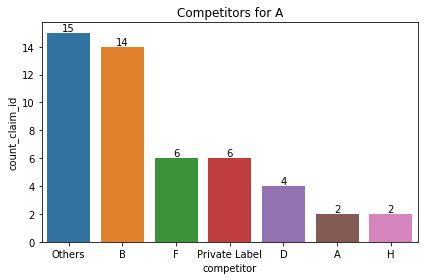

In [121]:
dummy = new_data2
t1 =dummy.groupby(['claim_id','vendor']).sum().reset_index()
claim_list = list(t1['claim_id'].unique())
competetors_dict = {}
for i in claim_list:
    t2 = t1[t1['claim_id'] ==i].sort_values('sales_dollars_value',ascending =False ).reset_index()
    if (t2.iloc[0]['vendor'] == 'Others') & (t2.shape[0]>1):
        if (t2.iloc[1]['vendor'] =='A') & (t2.shape[0]>2):
            competetors_dict[i] =  t2.iloc[2]['vendor']
        else :
            competetors_dict[i] =  t2.iloc[1]['vendor']
    elif (t2.iloc[0]['vendor'] == 'A') & (t2.shape[0]>1):
        if (t2.iloc[1]['vendor'] =='Others') & (t2.shape[0]>2):
            competetors_dict[i] =  t2.iloc[2]['vendor']
        else :
            competetors_dict[i] =  t2.iloc[1]['vendor']
    else:
        competetors_dict[i] =  t2.iloc[0]['vendor']
competetors_list_df = pd.DataFrame(list(competetors_dict.items()), columns =['claim_id','competitor'] )
table = competetors_list_df.value_counts('competitor').reset_index()
table.rename(columns = {0:'count_claim_id'}, inplace = True)

ax = sns.barplot(x="competitor", y='count_claim_id', data=table)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Competitors for A')
plt.savefig('fig-4.png')

In [122]:
table = pd.merge(competetors_list_df, Theme_clean,on = 'claim_id', how='inner')
table.drop('claim_id',axis=1, inplace=True)

In [123]:
table.to_csv('competitors list.csv')

## 2.3 Business intuition features

This section can go into production code if these features are used in final model

#### First Time Customer.
- A binary feature that tells if the customer is in business for the first time or not.

#### Days Since Last Purchase of a customer
- Feature representing the number of days from the last purchase of a customer. 
- Quantifies the Gaps customers take b/w purchases

# 3. Generate Train, Validation and Test datasets



- We split the data into train, test (optionally, also a validation dataset)
- In this example, we are binning the target into 10 quantiles and then use a Stratified Shuffle to split the data.
- See sklearn documentation on the various available splitters
- https://scikit-learn.org/stable/modules/classes.html#splitter-classes
- This will go into production code (training only)

from sklearn.model_selection import StratifiedShuffleSplit
from ta_lib.core.api import custom_train_test_split  # helper function to customize splitting
from scripts import *

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=context.random_seed)
sales_df_train, sales_df_test = custom_train_test_split(sales_df_processed, splitter, by=binned_selling_price)

In [124]:
f_data['unit_price'] = f_data['sales_dollars_value']/f_data['sales_units_value']

In [125]:
# Training and testing data
training_data = f_data[f_data['year']!=2019]
testing_data = f_data[f_data['year']==2019]

In [126]:
train_X = training_data.drop(columns=['sales_dollars_value','sales_units_value','sales_lbs_value','claim_id'],axis=1)
train_y = training_data['sales_dollars_value']
test_X = testing_data.drop(columns=['sales_dollars_value','sales_units_value','sales_lbs_value' ,'claim_id'],axis=1)
test_y = testing_data['sales_dollars_value']

In [127]:
save_dataset(context, train_X, 'train/Data/features')
save_dataset(context, train_y, 'train/Data/target')
save_dataset(context, test_X, 'test/Data/features')
save_dataset(context, test_y, 'test/Data/target')